## KNN usage in tow-dimensional data

In [1]:
import numpy
from matplotlib import pyplot as plt

In [2]:
xcord_a=[2.2,2.4,1.1]#x轴坐标
ycord_a=[1.4,2.3,3.4]#y轴坐标
#B类数据
xcord_b=[8.3,9.2,10.2,11.2]
ycord_b=[7.3,8.3,11.1,9.3]
#待测试样本
xcord_x=[4.6]
ycord_x=[3.4]


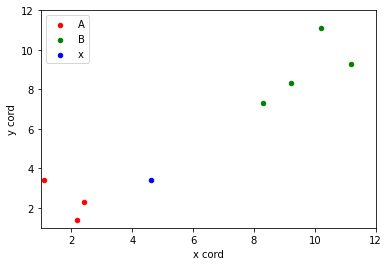

In [3]:
# Show Label & Figure of Data
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(xcord,ycord, c=colors, s=markers)
type1 = ax.scatter(xcord_a, ycord_a, s=20, c='red')#s=后面的数值是这个点的大小，c=表示颜色
type2 = ax.scatter(xcord_b, ycord_b, s=20, c='green')
type3 = ax.scatter(xcord_x, ycord_x, s=20, c='blue')
ax.legend([type1, type2, type3], ["A", "B", "x"], loc=2) #loc是从右上角开始数值为1的逆时针4个角的位置，范围1~4
ax.axis([1,12,1,12])#坐标范围，前2个数值是x坐标的范围，后2个是y轴坐标范围
plt.xlabel('x cord')
plt.ylabel('y cord')
plt.show()

In [4]:
# Show the data which is yet to be test
x = xcord_x[0]
y = ycord_x[0]
print('待测试对象坐标x=%f，y=%f'%(x,y))

待测试对象坐标x=4.600000，y=3.400000


In [5]:
#计算和A类样本的距离值
dista = []#保存和A类样本的距离值
ind = 0
for xa in xcord_a:
	ya = ycord_a[ind]#取对应y点坐标
	dist = ((x-xa)**2 + (y-ya)**2)**0.5#计算待测试数据与当前样本坐标的距离
	print('A:ind=%d,cord:(%f,%f),dist=%f'%(ind,xa,ya,dist))
	dista.append(dist)
	ind += 1
#计算和B类样本的距离值	
distb = []#保存和B类样本的距离值
ind = 0
for xb in xcord_b:
	yb = ycord_b[ind]#取对应y点坐标
	dist = ((x-xb)**2 + (y-yb)**2)**0.5#计算待测试数据与当前样本坐标的距离
	print('B:ind=%d,cord:(%f,%f),dist=%f'%(ind,xb,yb,dist))
	distb.append(dist)
	ind += 1


A:ind=0,cord:(2.200000,1.400000),dist=3.124100
A:ind=1,cord:(2.400000,2.300000),dist=2.459675
A:ind=2,cord:(1.100000,3.400000),dist=3.500000
B:ind=0,cord:(8.300000,7.300000),dist=5.375872
B:ind=1,cord:(9.200000,8.300000),dist=6.720863
B:ind=2,cord:(10.200000,11.100000),dist=9.521029
B:ind=3,cord:(11.200000,9.300000),dist=8.852683


## KNN usage in recognize Mnist

In [6]:
# Import Tensorflow & additional pkg
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/', one_hot=True)
tf.disable_eager_execution()                         # Tensorflow 2.0 中，eager execution 是默认开启的。

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


In [7]:
# Training Parameter
trainNum = 55000
testNum = 10000
trainSize = 500
testSize = 5
k = 4

In [8]:
# data 分解
trainIndex = np.random.choice(trainNum, trainSize, replace=False)
testIndex = np.random.choice(testNum, testSize, replace=False)
trainData = mnist.train.images[trainIndex]  # 训练图片
trainLabel = mnist.train.labels[trainIndex]  # 训练标签
testData = mnist.test.images[testIndex]  # 测试图片
testLabel = mnist.test.labels[testIndex]  # 测试标签

In [9]:
print(trainLabel[2])
print(trainLabel[3])
print(trainLabel[4])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
# 利用placeholder来完成数据的加载
trainDataInput = tf.placeholder(shape=[None, 784], dtype=tf.float32)
trainLabelInput = tf.placeholder(shape=[None, 10], dtype=tf.float32)
testDataInput = tf.placeholder(shape=[None, 784], dtype=tf.float32)
testLabelInput = tf.placeholder(shape=[None, 10], dtype=tf.float32)
print(testDataInput)

Tensor("Placeholder_2:0", shape=(None, 784), dtype=float32)


In [11]:
# KNN的距离
f1 = tf.expand_dims(testDataInput, 1)  # 维度扩展 在axis=1轴处添加一个为1的唯独
f2 = tf.subtract(trainDataInput, f1)  # 二者之差
f3 = tf.reduce_sum(tf.abs(f2), reduction_indices=2) # 求和
f4 = tf.negative(f3)  # 取反
f5, f6 = tf.nn.top_k(f4, k=k)  # 最大的四个值 f5表示的是数据 f6表示的该数据所处的下标
f7 = tf.gather(trainLabelInput, f6)  # 根据f6下标去寻找trainLabelInput中对应的标签
f8 = tf.reduce_sum(f7, reduction_indices=1)
f9 = tf.argmax(f8, dimension=1)

Instructions for updating:
Use the `axis` argument instead


In [12]:
print(f1)
print(f2)
print(f3)

Tensor("ExpandDims:0", shape=(None, 1, 784), dtype=float32)
Tensor("Sub:0", shape=(None, None, 784), dtype=float32)
Tensor("Sum:0", shape=(None, None), dtype=float32)


In [13]:
with tf.Session() as sess:
    p9 = sess.run(f9, feed_dict={trainDataInput: trainData, testDataInput: testData, trainLabelInput: trainLabel})
    p10 = np.argmax(testLabel, axis=1)
    print('预测值:', p9)
    print('真实值:', p10)
 
j = 0
for i in range(0, testSize):
    if p10[i] == p9[i]:
        j += 1
print('accuracy:', j*100/testSize)

预测值: [4 8 1 2 1]
真实值: [4 8 1 2 1]
accuracy: 100.0
